In [ ]:
#The objective of this project is to predict customer churn for a bank. By understanding the factors that contribute
#to churn, the bank can take proactive measures to retain customers and reduce revenue loss. The dataset used for this
#analysis contains various customer attributes like credit score, demographics, and transaction history.
#The prediction task is framed as a binary classification problem, where the model predicts whether a customer will churn
#or not.

In [9]:
#Data Exploration
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('Bank Turnover Dataset.csv')

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print(df.info())

print(f"Number of unique values in `Exited`: {df['Exited'].nunique()}")

print(f"\nCount of each unique value in `Exited`:\n")
print(df['Exited'].value_counts())

print(f"\nPercentage of each unique value in `Exited`:\n")
print(df['Exited'].value_counts(normalize=True))

| RowNumber   | CustomerId   | Surname   | CreditScore   | Geography   | Gender   | Age   | Tenure   | Balance   | NumOfProducts   | HasCrCard   | IsActiveMember   | EstimatedSalary   | Exited   |
|:------------|:-------------|:----------|:--------------|:------------|:---------|:------|:---------|:----------|:----------------|:------------|:-----------------|:------------------|:---------|
| 1           | 15634602     | Hargrave  | 619           | France      | Female   | 42    | 2        | 0         | 1               | 1           | 1                | 101349            | 1        |
| 2           | 15647311     | Hill      | 608           | Spain       | Female   | 41    | 1        | 83807.9   | 1               | 0           | 1                | 112543            | 0        |
| 3           | 15619304     | Onio      | 502           | France      | Female   | 42    | 8        | 159661    | 3               | 1           | 0                | 113932            | 1        |
| 4           |

In [11]:
#The dataset doesn't have any missing values. The target variable Exited is imbalanced, with a significantly higher 
#proportion of non-churned customers.Evaluation methods suitable for this task include calculating accuracy, precision,
#recall, F1-score, and ROC-AUC.

In [13]:
#Data Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = scaler.fit_transform(
    X_train[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]
)
X_test[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = scaler.transform(
    X_test[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]
)

print(X_train.head().to_markdown(index=False, numalign="left", stralign="left"))

print(X_train.info())

| CreditScore   | Age       | Tenure    | Balance   | NumOfProducts   | HasCrCard   | IsActiveMember   | EstimatedSalary   | Geography_Germany   | Geography_Spain   | Gender_Male   |
|:--------------|:----------|:----------|:----------|:----------------|:------------|:-----------------|:------------------|:--------------------|:------------------|:--------------|
| 0.3565        | -0.655786 | 0.34568   | -1.21847  | 0.808436        | 1           | 1                | 1.36767           | False               | False             | True          |
| -0.203898     | 0.294938  | -0.348369 | 0.696838  | 0.808436        | 1           | 1                | 1.66125           | True                | False             | True          |
| -0.961472     | -1.41637  | -0.695393 | 0.618629  | -0.916688       | 1           | 0                | -0.252807         | False               | True              | True          |
| -0.940717     | -1.13115  | 1.38675   | 0.953212  | -0.916688       | 1           |

In [15]:
#Data preprocessing to train the model is performed by first:

#Dropped unnecessary columns: RowNumber, CustomerId, Surname.
#One-hot encoding categorical features  are Geography, Gender.
#Split the data into train and test sets. Standardized the numeric features to have zero mean and unit variance.

In [17]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
#Three different models were trained and evaluated:
#Logistic Regression
#Decision Tree
#Random Forest

In [23]:
#Model Assessment
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression Evaluation
# Make predictions on the training and test sets using Logistic Regression model
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# Calculate evaluation metrics for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Logistic Regression Evaluation Metrics:\n")
print("Training Data:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

print("\nTest Data:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")

# Decision Tree Evaluation
# Make predictions on the training and test sets using Decision Tree model
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Calculate evaluation metrics for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Print the evaluation metrics
print("\nDecision Tree Evaluation Metrics:\n")
print("Training Data:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

print("\nTest Data:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")

# Random Forest Evaluation
# Make predictions on the training and test sets using Random Forest model
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate evaluation metrics for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Print the evaluation metrics
print("\nRandom Forest Evaluation Metrics:\n")
print("Training Data:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

print("\nTest Data:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")


Logistic Regression Evaluation Metrics:

Training Data:
Accuracy: 0.8110
Precision: 0.6134
Recall: 0.2172
F1-Score: 0.3208
ROC-AUC: 0.5909

Test Data:
Accuracy: 0.8115
Precision: 0.5563
Recall: 0.2010
F1-Score: 0.2953
ROC-AUC: 0.5809

Decision Tree Evaluation Metrics:

Training Data:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Test Data:
Accuracy: 0.7810
Precision: 0.4490
Recall: 0.5038
F1-Score: 0.4748
ROC-AUC: 0.6763

Random Forest Evaluation Metrics:

Training Data:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000

Test Data:
Accuracy: 0.8665
Precision: 0.7625
Recall: 0.4656
F1-Score: 0.5782
ROC-AUC: 0.7151


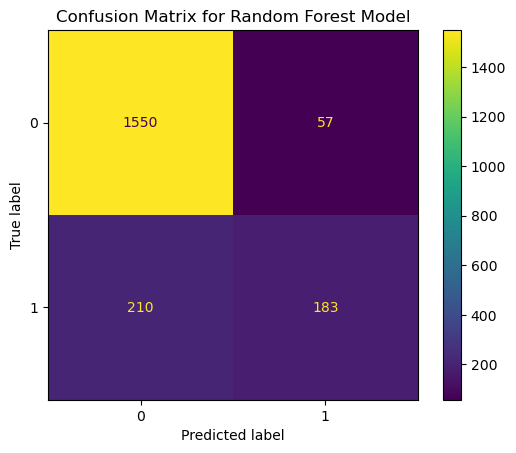


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



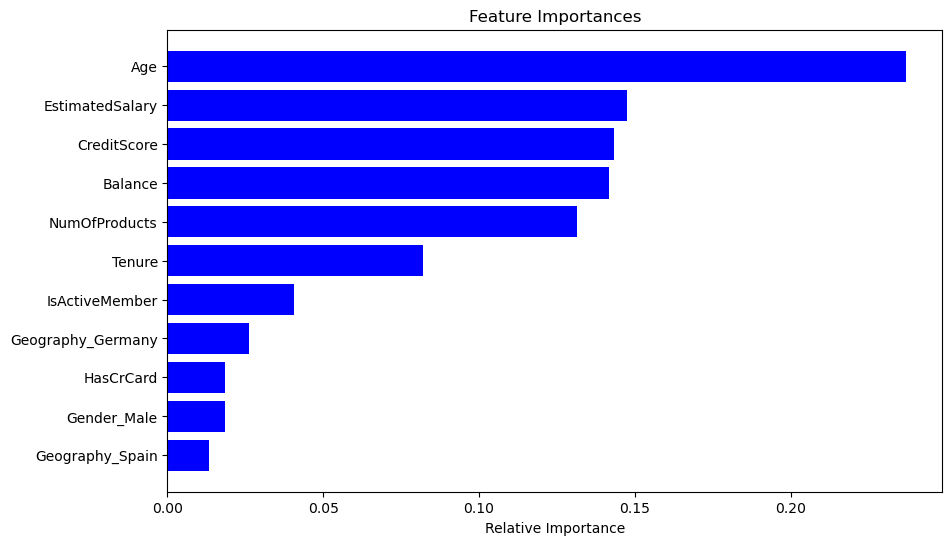

In [27]:
#Model's Data Visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Assuming binary classification (0: No churn, 1: Churn)
disp.plot()
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [29]:
# Analysis

logistic_regression_performance = {
    'Training Accuracy': 0.8110,
    'Test Accuracy': 0.8115,
    'Recall': 0.2010,
    'ROC_AUC': 0.58,
}
logistic_regression_implication = (
    "Good generalization, but poor recall undermines churn prediction effectiveness."
)

decision_tree_performance = {
    'Training Accuracy': 'Perfect',
    'Test Accuracy': 0.7810,
    'Recall': 0.5038,
    'F1_Score': 0.4748,
    'ROC_AUC': 0.6763,
}
decision_tree_implication = (
    "Better recall than Logistic Regression, but lacks reliability due to overfitting."
)

random_forest_performance = {
    'Test Accuracy': 0.8665,
    'F1_Score': 0.5782,
    'ROC_AUC': 0.7151,
    'Recall': 0.4656,
    'Precision': 0.7625,
}
random_forest_implication = (
    "Strongest ability to distinguish churners with effective resource allocation."
)

feature_importance = ["Age", "CreditScore", "Balance"]

conclusion = (
    "The Random Forest model is the most effective, balancing accuracy and recall despite some overfitting. "
    "The Logistic Regression model lacks effective recall, while the Decision Tree is prone to high overfitting."
)

recommendations = {
    'Key Findings': "Random Forest is the best model for churn prediction.",
    'Actionable Insights': (
        "Focus retention efforts on features like Age, CreditScore, and Balance."
    ),
    'Next Steps': [
        "Hyperparameter tuning for Random Forest to enhance recall.",
        "Explore class balancing techniques to improve Logistic Regression.",
        "Consider other algorithms like Gradient Boosting for potential improvements.",
    ],
}

def print_analysis():
    print("# Analysis")
    print("\n## 1. Logistic Regression")
    for key, value in logistic_regression_performance.items():
        print(f"- {key}: {value}")
    print(f"- Business Implication: {logistic_regression_implication}\n")

    print("## 2. Decision Tree")
    for key, value in decision_tree_performance.items():
        print(f"- {key}: {value}")
    print(f"- Business Implication: {decision_tree_implication}\n")

    print("## 3. Random Forest")
    for key, value in random_forest_performance.items():
        print(f"- {key}: {value}")
    print(f"- Business Implication: {random_forest_implication}\n")

    print("## Feature Importance")
    print(f"- Key Drivers: {', '.join(feature_importance)}\n")

    print("# Conclusion")
    print(conclusion + "\n")

    print("# Business Implications and Recommendations")
    for key, value in recommendations.items():
        print(f"- {key}: {value}")

print_analysis()


# Analysis

## 1. Logistic Regression
- Training Accuracy: 0.811
- Test Accuracy: 0.8115
- Recall: 0.201
- ROC_AUC: 0.58
- Business Implication: Good generalization, but poor recall undermines churn prediction effectiveness.

## 2. Decision Tree
- Training Accuracy: Perfect
- Test Accuracy: 0.781
- Recall: 0.5038
- F1_Score: 0.4748
- ROC_AUC: 0.6763
- Business Implication: Better recall than Logistic Regression, but lacks reliability due to overfitting.

## 3. Random Forest
- Test Accuracy: 0.8665
- F1_Score: 0.5782
- ROC_AUC: 0.7151
- Recall: 0.4656
- Precision: 0.7625
- Business Implication: Strongest ability to distinguish churners with effective resource allocation.

## Feature Importance
- Key Drivers: Age, CreditScore, Balance

# Conclusion
The Random Forest model is the most effective, balancing accuracy and recall despite some overfitting. The Logistic Regression model lacks effective recall, while the Decision Tree is prone to high overfitting.

# Business Implications and Rec

In [ ]:
#BarelyDedicated, 2020. Bank Customer Churn Modeling. [online] Kaggle.
#Available at: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling 
#[Accessed 26 September 2024].